In [2]:
import os
from glob import glob

import numpy as np
import matplotlib.pyplot as plt

In [6]:
root_path = "../../Data/Experiment_4_5"

In [16]:
noises = {p.split("/")[-1].split(".")[0].split("_")[-1]:np.load(p) for p in glob(os.path.join(root_path, "*")) if "noises" in p}
for k,v in noises.items(): print(k, v.shape)

yb (10, 40, 256, 256, 3)
rg (10, 40, 256, 256, 3)
a (10, 40, 256, 256, 3)


In [12]:
# bg = {p.split("/")[-1].split(".")[0].split("_")[-1]:np.load(p) for p in glob(os.path.join(root_path, "*")) if "background" in p}
bg = np.load(os.path.join(root_path, "background.npy"))
bg.shape

(256, 256, 3)

In [11]:
def model(img):
    return img
def calculate_diffs(img1, img2):
    a, b = model(img1), model(img2)
    return ((a-b)**2).mean(axis=(1,2,3))**(1/2)

In [19]:
diffs = {}
for k, noises_ in noises.items():
    diffs_it = []
    for noise_it in noises_:
        diff = calculate_diffs(noise_it, bg[None,...])
        # print(noise_it.shape, bg.shape, diff.shape)
        diffs_it.append(diff)
        # break
    diffs_it = np.array(diffs_it)
    diffs[k] = diffs_it.mean(axis=0)
    # break

In [20]:
diffs

{'yb': array([0.        , 0.00961358, 0.00960509, 0.00962234, 0.0096232 ,
        0.00962289, 0.0096233 , 0.00962159, 0.00962063, 0.00962467,
        0.00963018, 0.00962701, 0.0096249 , 0.00962821, 0.0096241 ,
        0.00962418, 0.0096234 , 0.00962268, 0.00962406, 0.00962481,
        0.00962609, 0.00962552, 0.00962405, 0.00962567, 0.00962576,
        0.00962589, 0.00962834, 0.00962822, 0.00962536, 0.00962831,
        0.00962627, 0.00962535, 0.00962548, 0.0096258 , 0.00962485,
        0.0096231 , 0.00962489, 0.00962655, 0.00962598, 0.0096267 ]),
 'rg': array([0.        , 0.00988805, 0.00990314, 0.00990386, 0.00993217,
        0.00991742, 0.00992829, 0.0099373 , 0.00993843, 0.00993151,
        0.00993099, 0.00992822, 0.00992811, 0.009931  , 0.00991592,
        0.00992672, 0.00992272, 0.00993261, 0.00992738, 0.00993452,
        0.00992852, 0.00992823, 0.00992919, 0.00993043, 0.00993077,
        0.00992534, 0.00993386, 0.00993092, 0.00992242, 0.00992642,
        0.00993024, 0.00993323, 0.

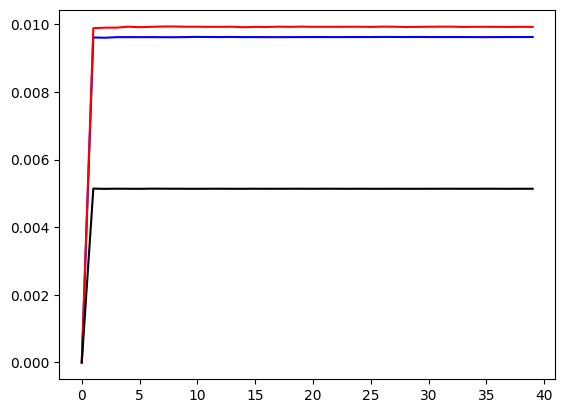

In [22]:
fig, ax = plt.subplots()
for k, v in diffs.items():
    if k == "a": color = "k"
    elif k == "rg": color = "red"
    elif k == "yb": color = "blue"
    ax.plot(v, label=k, color=color)
plt.show()